In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("ToyotaCorolla.csv", index_col=0, encoding="unicode_escape")
df.head()

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,,,,,,,,,,,,,,,,,,,,,
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,1,0,0,0,1,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,1,0,1,0,0,0,1,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,0,1,0,0,0,1,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,0,1,0,0,0,1,0,0,0
5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,1,0,1,0,1,0,0,0


In [4]:
df = df[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]

In [6]:
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,
1,13500,23,46986,90,2000,3,5,210,1165
2,13750,23,72937,90,2000,3,5,210,1165
3,13950,24,41711,90,2000,3,5,210,1165
4,14950,26,48000,90,2000,3,5,210,1165
5,13750,30,38500,90,2000,3,5,210,1170


In [7]:
#viewing the data information:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 1 to 1442
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 112.2 KB


In [8]:
#checking for any missing values:
df.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [58]:
#count of duplicated rows:
df[df.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,
115,24950,8,13253,116,2000,5,5,234,1320


In [61]:
df = df.drop_duplicates()

In [62]:
df.shape

(1435, 9)

In [66]:
#Checking the descriptive statistics:
df.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


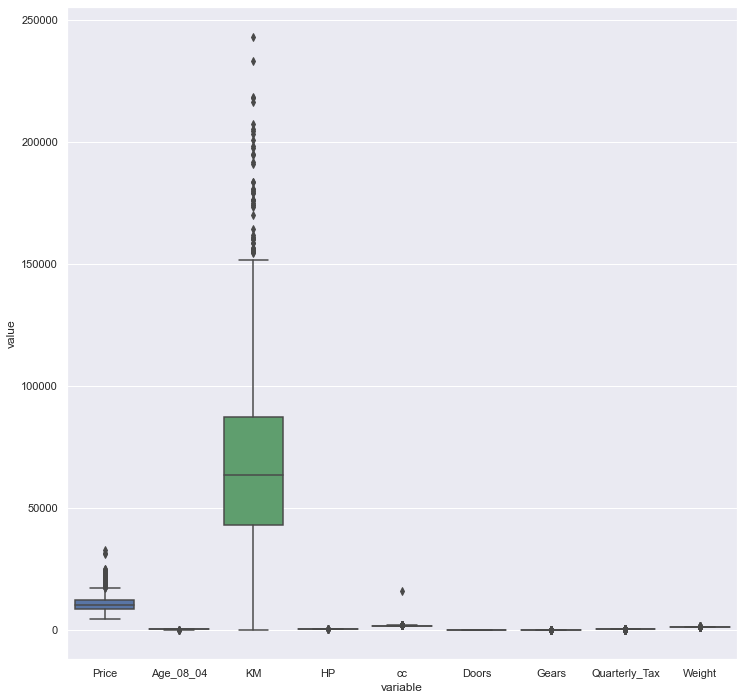

In [67]:
sns.set(rc={'figure.figsize':(12,12)})
sns.boxplot(x='variable',y='value',data=pd.melt(df)) #pd.melt converts wide-data to long-data that helps in boxplot.

There are a few outliers in price, KM and cc variable.

****Correlation coefficients and heatmap****:

In [68]:
import matplotlib.pyplot as plt

In [69]:
df.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


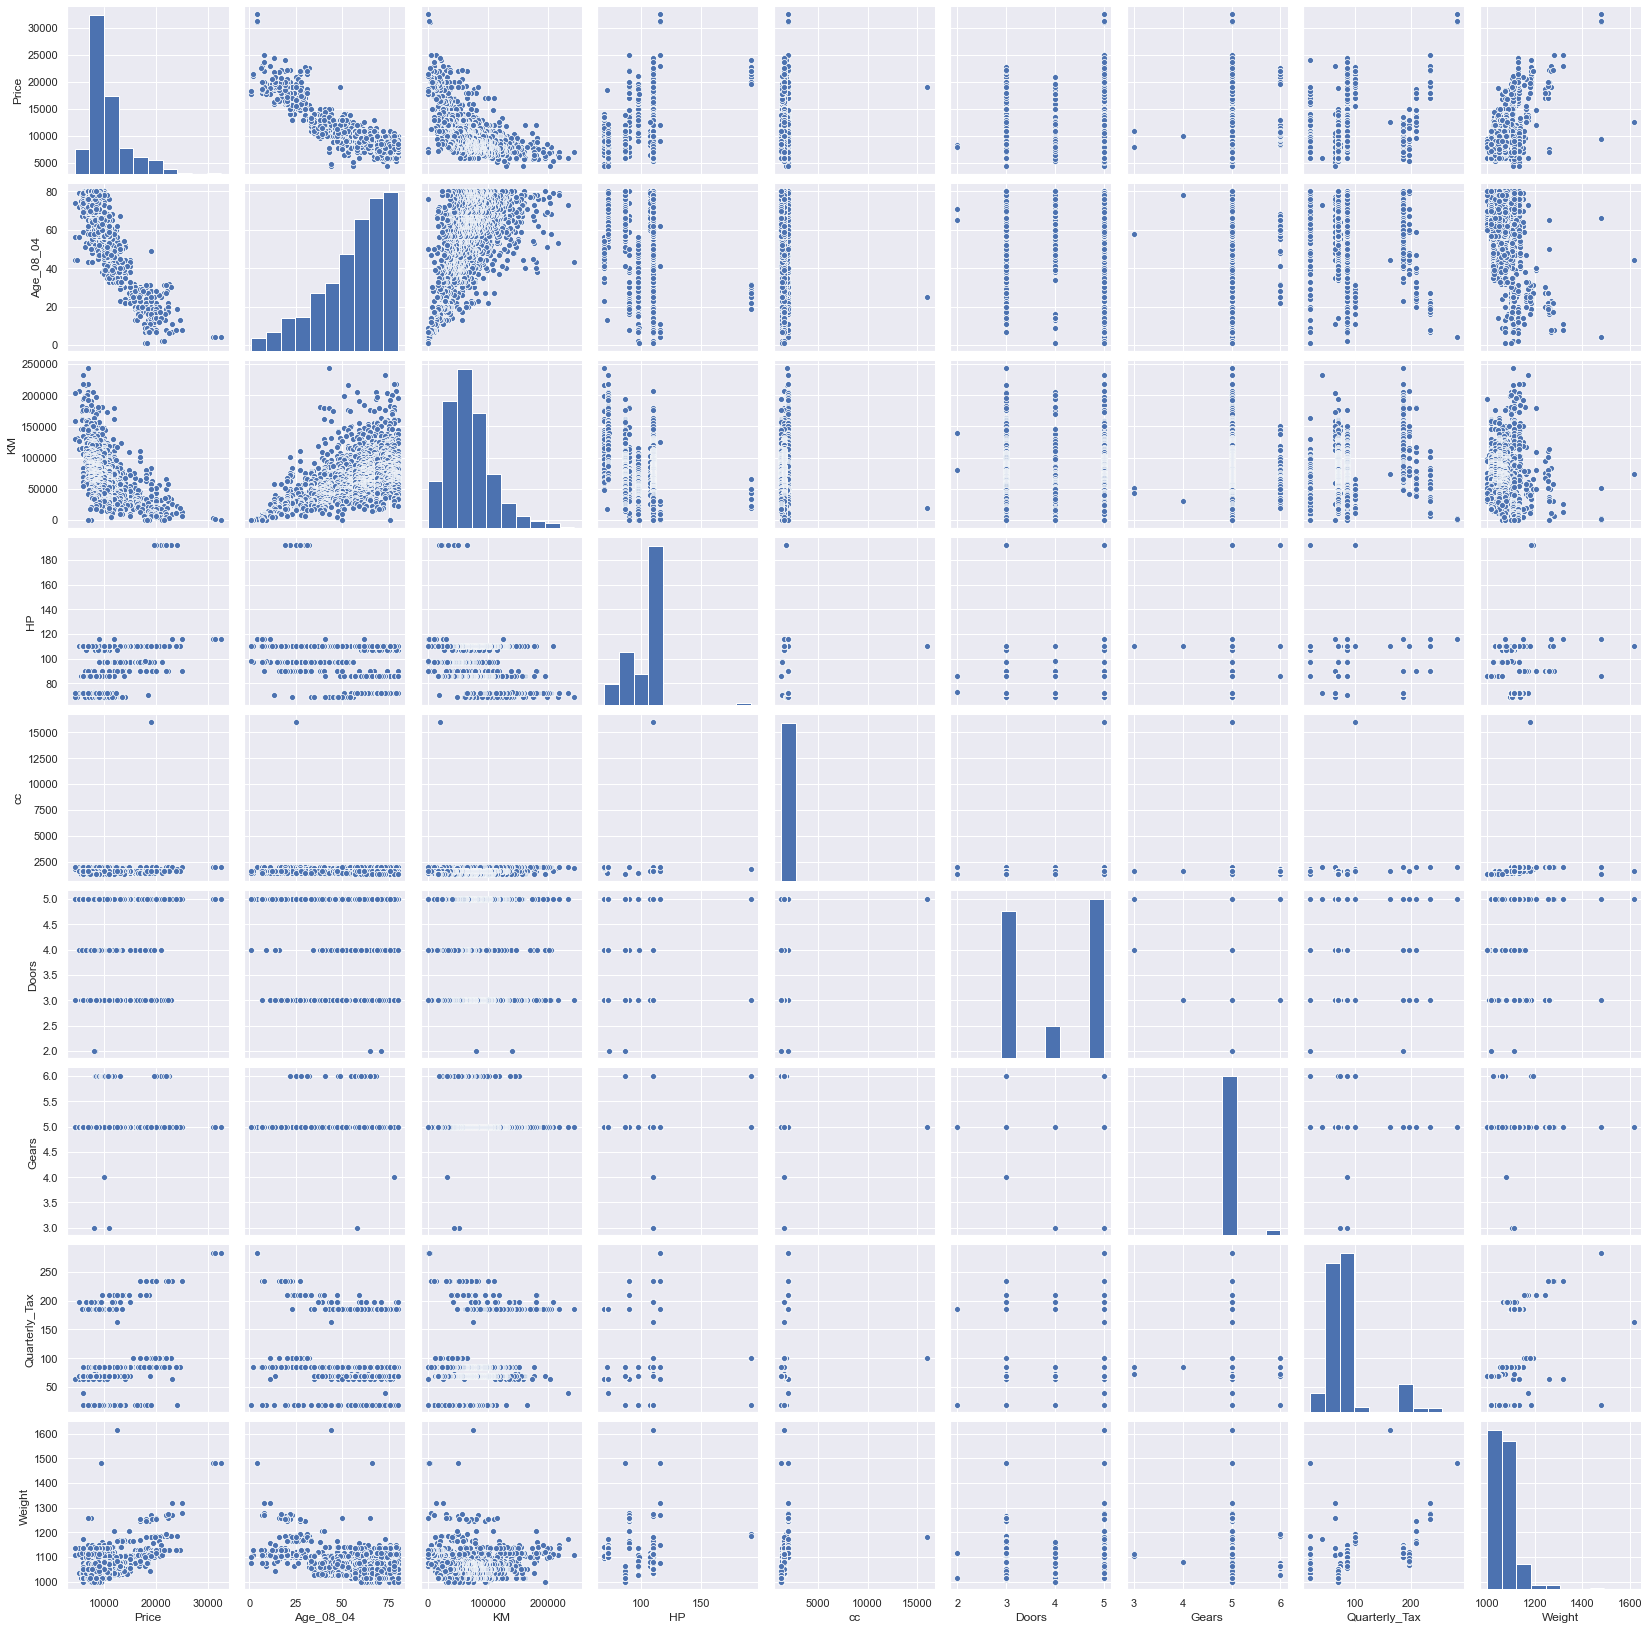

In [70]:
sns.pairplot(df)

Text(0.5, 1.0, 'Correlation Heatmap')

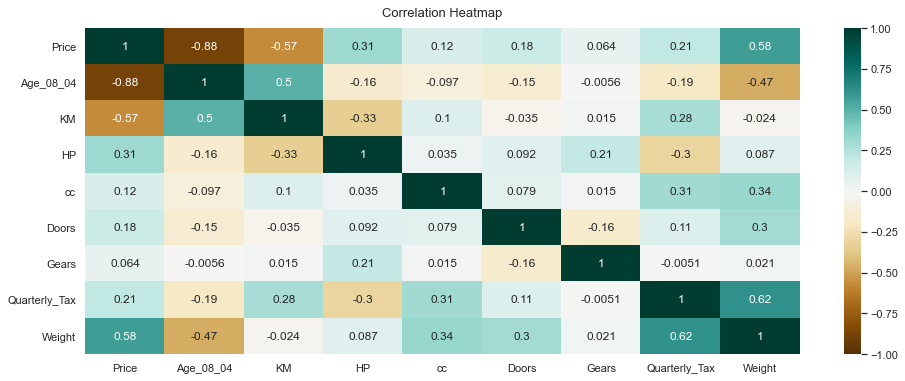

In [71]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True,cmap="BrBG")
heatmap.set_title("Correlation Heatmap", fontdict={'fontsize':13},pad=12)

Text(0.5, 1.0, 'Triangle heatmap correlation')

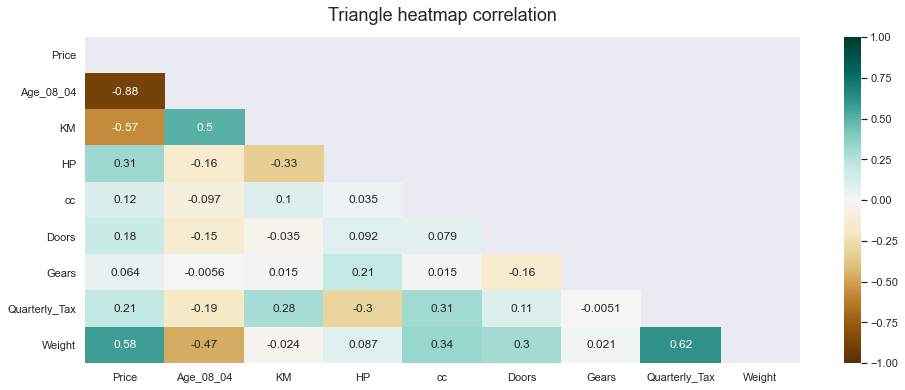

In [72]:
#Trying to display only the lower triangle of the heatmap for better visualization:
import numpy as np
mask = np.triu(np.ones_like(df.corr(),dtype=np.bool))
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title("Triangle heatmap correlation", fontdict={'fontsize':18},pad=16)

Text(0.5, 1.0, 'Features correlating with Price')

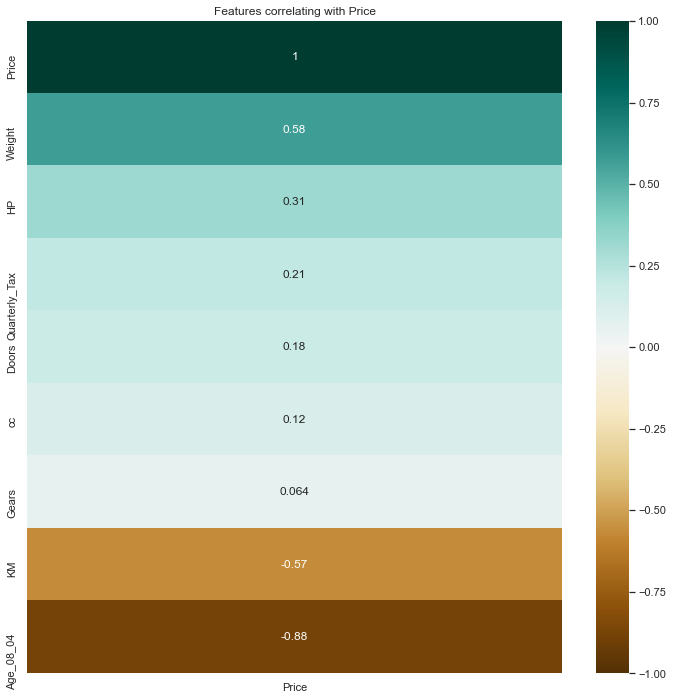

In [73]:
features = sns.heatmap(df.corr()[['Price']].sort_values(by='Price',ascending=False), vmin=-1, vmax=1, annot=True,
                       cmap='BrBG')
features.set_title("Features correlating with Price")

we can see that, our dependant variable price of the car highly positively correlates with weight and 
highly negatively correlates with age.

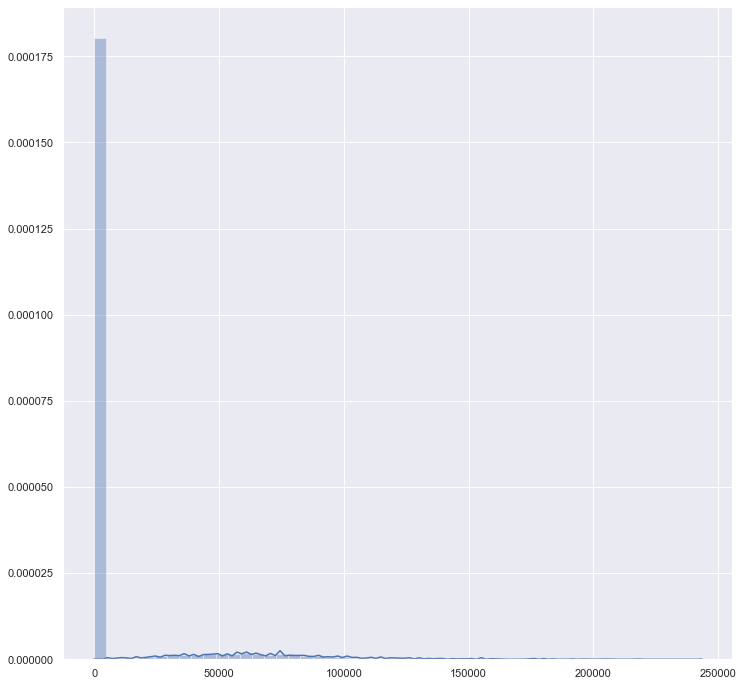

In [74]:
df_independant = df[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
sns.distplot(df_independant) 

In [75]:
#Multiple linear regression model building:
import statsmodels.formula.api as smf
car_model = smf.ols("Price ~ Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data=df).fit()

In [76]:
car_model.params

Intercept       -5472.540368
Age_08_04        -121.713891
KM                 -0.020737
HP                 31.584612
cc                 -0.118558
Doors              -0.920189
Gears             597.715894
Quarterly_Tax       3.858805
Weight             16.855470
dtype: float64

In [77]:
#values:
np.round(car_model.pvalues,5)

Intercept        0.00011
Age_08_04        0.00000
KM               0.00000
HP               0.00000
cc               0.18824
Doors            0.98164
Gears            0.00245
Quarterly_Tax    0.00329
Weight           0.00000
dtype: float64

All the independent variables except cc and Doors have p value less than 0.05. from this we could infer that all the independent variables like Age, KM, HP, Gears, Quarterly tax and weight are significat factors in determining the price of the car.

In [78]:
 print(car_model.tvalues)

Intercept        -3.875273
Age_08_04       -46.551876
KM              -16.552424
HP               11.209719
cc               -1.316436
Doors            -0.023012
Gears             3.034563
Quarterly_Tax     2.944198
Weight           15.760663
dtype: float64


In [79]:
print(car_model.rsquared)

0.8625200256947001


Our model has explained around 86% variablity in the dataset which is, 86% of variation in car price is explained by our regression on other independant variables like Age, KM, HP, cc, Doors, Gears, Quarterly tax and weight.

# Model validation:

since the cc and Doors variables have higher p values, seperate simple linear regression model and a multiple linear regression model is build to verify them.

In [80]:
cc_SLR_model = smf.ols('Price~cc', data=df).fit()

In [81]:
cc_SLR_model.params

Intercept    9053.536789
cc              1.057605
dtype: float64

In [86]:
cc_SLR_model.pvalues

Intercept    7.236022e-114
cc            2.292856e-06
dtype: float64

The p value for the variable is less than 0.05 and inferring its singnificance to the model prediction.

In [87]:
doors_SLR_model = smf.ols('Price~Doors', data=df).fit()

In [88]:
doors_SLR_model.params

Intercept    7916.145233
Doors         695.497769
dtype: float64

In [89]:
doors_SLR_model.pvalues

Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64

The p value for the doors variable is also lower than 0.05 and it is also a significant predictor.
so, we will move ahead in performing multiple linear regression with these 2 variables alone to check for multi collinearity.

In [90]:
MLR_cc_doors_model = smf.ols('Price~cc+Doors', data=df).fit()

In [91]:
MLR_cc_doors_model.params

Intercept    6568.339539
cc              0.939773
Doors         662.318691
dtype: float64

In [92]:
MLR_cc_doors_model.pvalues

Intercept    1.580945e-35
cc           2.101878e-05
Doors        2.109558e-11
dtype: float64

The cc and Doors both have significance.

# Multi collinearity check:

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
df_independant.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,
1,23,46986,90,2000,3,5,210,1165
2,23,72937,90,2000,3,5,210,1165
3,24,41711,90,2000,3,5,210,1165
4,26,48000,90,2000,3,5,210,1165
5,30,38500,90,2000,3,5,210,1170


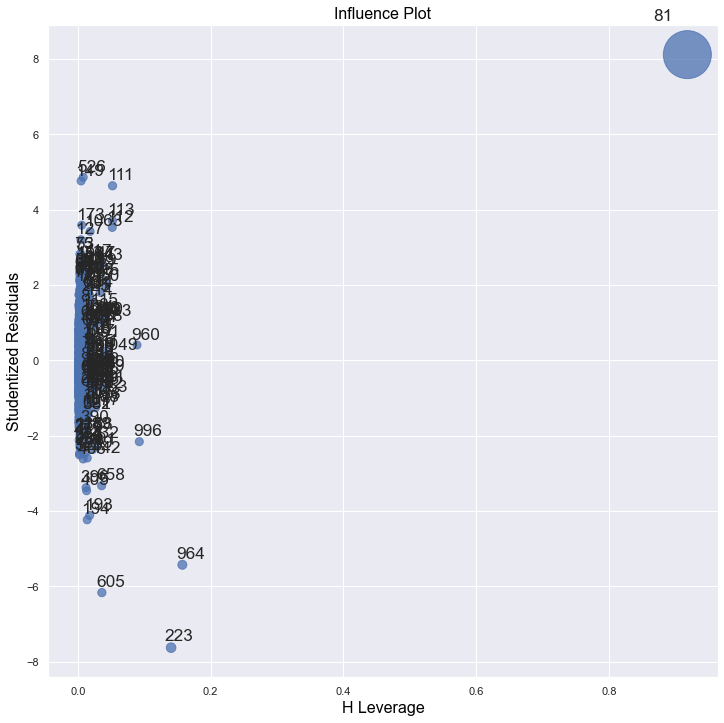

In [116]:
import statsmodels.api as sm
sm.graphics.influence_plot(car_model)
plt.show()

In [117]:
#the highest influecial point is 81. We will remove 81 and run the model

In [133]:
df_1 = df.drop(df.index[[81]], axis=0)
car_model_1 = smf.ols("Price ~ Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data=df_1).fit()

In [134]:
car_model_1.params

Intercept       -5468.363357
Age_08_04        -121.672513
KM                 -0.020720
HP                 31.584773
cc                 -0.118468
Doors              -1.656876
Gears             597.795101
Quarterly_Tax       3.865549
Weight             16.849170
dtype: float64

In [135]:
car_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1115.
Date:                Wed, 02 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:18:38   Log-Likelihood:                -12358.
No. Observations:                1434   AIC:                         2.473e+04
Df Residuals:                    1425   BIC:                         2.478e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5468.3634   1412.221     -3.872      0.000   -8238.619   -2698.108
Age_08_04      -121.6725      2.615    -46.528      0.000    -126.802    -116.543
KM               -0.0207      0.001    -16.536      0.000      -0.023      -0.018
HP               31.5848      2.818     11.209      0.000      26.057      37.112
cc               -0.1185      0.090     -1.315      0.189      -0.295       0.058
Doors            -1.6569     39.997     -0.041      0.967     -80.116      76.802
Gears           597.7951    196.976      3.035      0.002     211.402     984.189
Quarterly_Tax     3.8655      1.311      2.949      0.003       1.294       6.437
Weight           16.8492      1.070     15.754      0.000      14.751      18.947
==============================================================================
Omnibus:                      149.355   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.873
Skew:                          -0.201   Prob(JB):                    4.60e-218
Kurtosis:                       7.073   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The variable doors is insignificant

In [136]:
#removing 223 which is the next influencing index
df_2 = df.drop(df.index[[81, 964]], axis=0)
car_model_2 = smf.ols("Price ~ Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data=df_2).fit()
car_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1115.
Date:                Wed, 02 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:18:56   Log-Likelihood:                -12349.
No. Observations:                1433   AIC:                         2.472e+04
Df Residuals:                    1424   BIC:                         2.476e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5472.4219   1412.785     -3.873      0.000   -8243.785   -2701.059
Age_08_04      -121.6508      2.617    -46.478      0.000    -126.785    -116.516
KM               -0.0207      0.001    -16.531      0.000      -0.023      -0.018
HP               31.5909      2.819     11.207      0.000      26.062      37.120
cc               -0.1185      0.090     -1.315      0.189      -0.295       0.058
Doors            -1.4145     40.022     -0.035      0.972     -79.924      77.095
Gears           597.7461    197.041      3.034      0.002     211.225     984.268
Quarterly_Tax     3.8678      1.311      2.950      0.003       1.296       6.440
Weight           16.8511      1.070     15.750      0.000      14.752      18.950
==============================================================================
Omnibus:                      149.203   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              998.475
Skew:                          -0.202   Prob(JB):                    1.53e-217
Kurtosis:                       7.069   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Variable doors is again insignificant.
we will remove 964

In [171]:
df_3 = df.drop(df.index[[80,221,960]], axis=0)
car_model_3 = smf.ols("Price ~ Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data=df_3).fit()
car_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1173.
Date:                Wed, 02 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:52:08   Log-Likelihood:                -12308.
No. Observations:                1432   AIC:                         2.463e+04
Df Residuals:                    1423   BIC:                         2.468e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6177.6282   1383.689     -4.465      0.000   -8891.918   -3463.338
Age_08_04      -120.5120      2.562    -47.035      0.000    -125.538    -115.486
KM               -0.0178      0.001    -13.945      0.000      -0.020      -0.015
HP               39.2946      2.911     13.497      0.000      33.583      45.006
cc               -2.5030      0.307     -8.145      0.000      -3.106      -1.900
Doors           -24.0644     39.252     -0.613      0.540    -101.062      52.933
Gears           526.4698    192.769      2.731      0.006     148.328     904.612
Quarterly_Tax     8.9575      1.426      6.281      0.000       6.160      11.755
Weight           20.0247      1.118     17.911      0.000      17.832      22.218
==============================================================================
Omnibus:                      241.479   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2622.772
Skew:                          -0.426   Prob(JB):                         0.00
Kurtosis:                       9.575   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 

In [172]:
car_model_3.params

Intercept       -6177.628209
Age_08_04        -120.511962
KM                 -0.017818
HP                 39.294589
cc                 -2.503027
Doors             -24.064420
Gears             526.469821
Quarterly_Tax       8.957456
Weight             20.024686
dtype: float64

In [173]:
car_model_3.rsquared

0.8683509351531514

The doors variable even after removing the influecing values, stays insignificant.
Alternatively, we will check using VIF:

In [174]:
doors_vif = smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight', data=df_3).fit().rsquared

In [175]:
vif_doors = 1/(1-doors_vif)
vif_doors

1.1626266240650422

In [176]:
from statsmodels.graphics.regressionplots import plot_partregress_grid

The VIF for doors variable is less than 10, but p value is higher than 0.05.
we will check with AV plots.

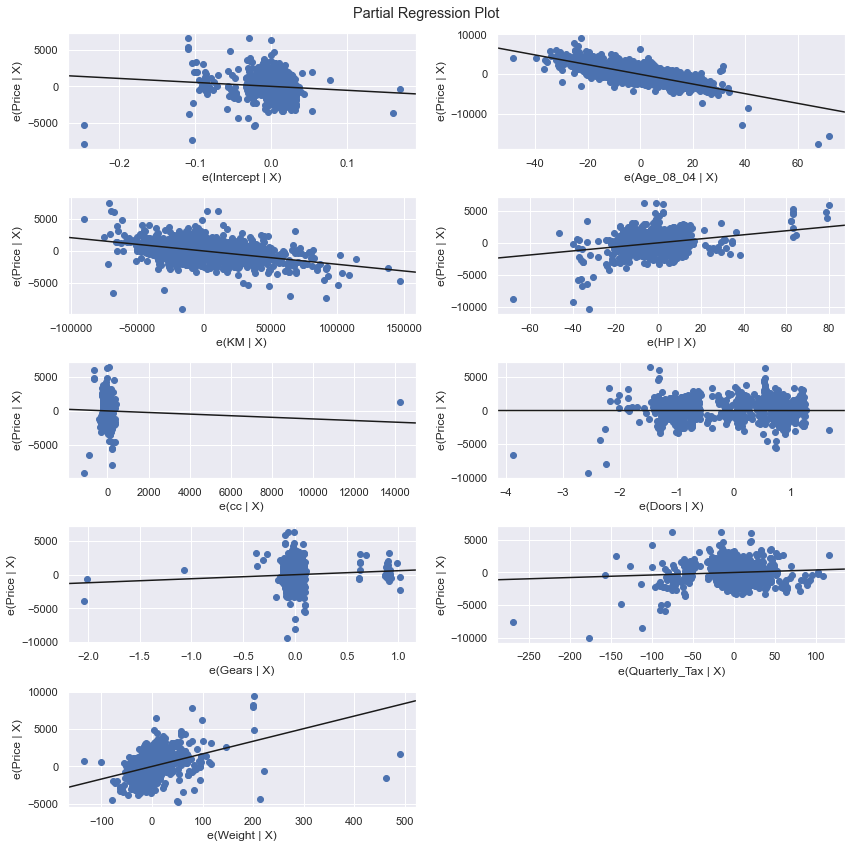

In [157]:
sm.graphics.plot_partregress_grid(car_model_3)
plt.show()

In [177]:
# we will build the model withut the doors variable.
car_model_4 = smf.ols("Price ~ Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight", data=df_3).fit()

In [178]:
car_model_4.params

Intercept       -6202.421530
Age_08_04        -120.515445
KM                 -0.017858
HP                 39.129927
cc                 -2.487586
Gears             549.231981
Quarterly_Tax       8.985169
Weight             19.844128
dtype: float64

In [179]:
car_model_4.pvalues

Intercept         7.861677e-06
Age_08_04        2.832310e-292
KM                8.345979e-42
HP                3.566443e-39
cc                9.669650e-16
Gears             3.739097e-03
Quarterly_Tax     3.840342e-10
Weight            5.108086e-68
dtype: float64

In [180]:
#np.round(print(car_model_4.pvalues,5))
#values:
np.round(car_model_4.pvalues,5)

Intercept        0.00001
Age_08_04        0.00000
KM               0.00000
HP               0.00000
cc               0.00000
Gears            0.00374
Quarterly_Tax    0.00000
Weight           0.00000
dtype: float64

Now, all the variables are significant. Thois model is chosen as our final model

In [181]:
final_car_model = smf.ols("Price ~ Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight", data=df_3).fit()
final_car_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1341.
Date:                Wed, 02 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:54:39   Log-Likelihood:                -12308.
No. Observations:                1432   AIC:                         2.463e+04
Df Residuals:                    1424   BIC:                         2.467e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6202.4215   1382.795     -4.485      0.000   -8914.956   -3489.887
Age_08_04      -120.5154      2.562    -47.046      0.000    -125.540    -115.490
KM               -0.0179      0.001    -13.997      0.000      -0.020      -0.015
HP               39.1299      2.898     13.501      0.000      33.444      44.815
cc               -2.4876      0.306     -8.124      0.000      -3.088      -1.887
Gears           549.2320    189.119      2.904      0.004     178.251     920.213
Quarterly_Tax     8.9852      1.425      6.305      0.000       6.190      11.781
Weight           19.8441      1.078     18.403      0.000      17.729      21.959
==============================================================================
Omnibus:                      235.194   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2494.482
Skew:                          -0.410   Prob(JB):                         0.00
Kurtosis:                       9.414   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [182]:
#predictions:
finalmodel_pred = final_car_model.predict(df_3)

# validation

Text(0, 0.5, 'Fitted values')

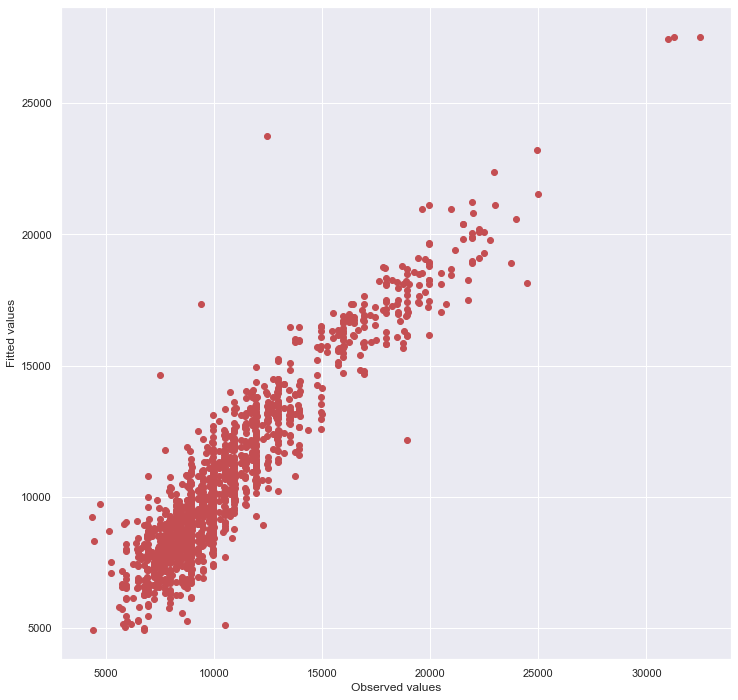

In [185]:
#1. Linearity:
plt.scatter(df_3['Price'],finalmodel_pred,c='r');plt.xlabel("Observed values");plt.ylabel("Fitted values")

It is linear.

Text(0, 0.5, 'Residuals')

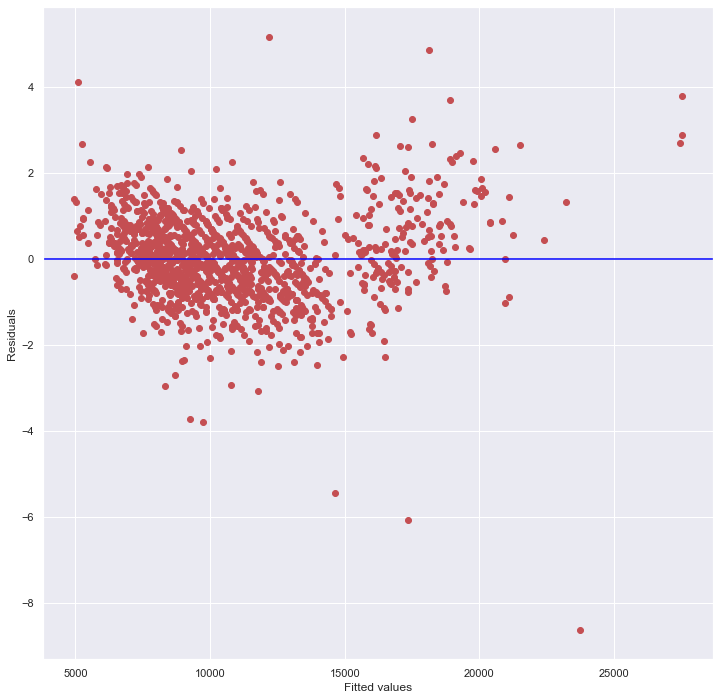

In [187]:
# Residulas vs fitted values:
plt.scatter(finalmodel_pred, final_car_model.resid_pearson,c='r');plt.axhline(y=0,color='blue');plt.xlabel("Fitted values");plt.ylabel("Residuals")

Erros have equal variance as no patterns are observed. Homoscedasticity

(array([  1.,   1.,   1.,   2.,  41., 445., 762., 162.,  14.,   3.]),
 array([-8.61835744, -7.24003224, -5.86170704, -4.48338184, -3.10505664,
        -1.72673144, -0.34840624,  1.02991896,  2.40824417,  3.78656937,
         5.16489457]),
 <a list of 10 Patch objects>)

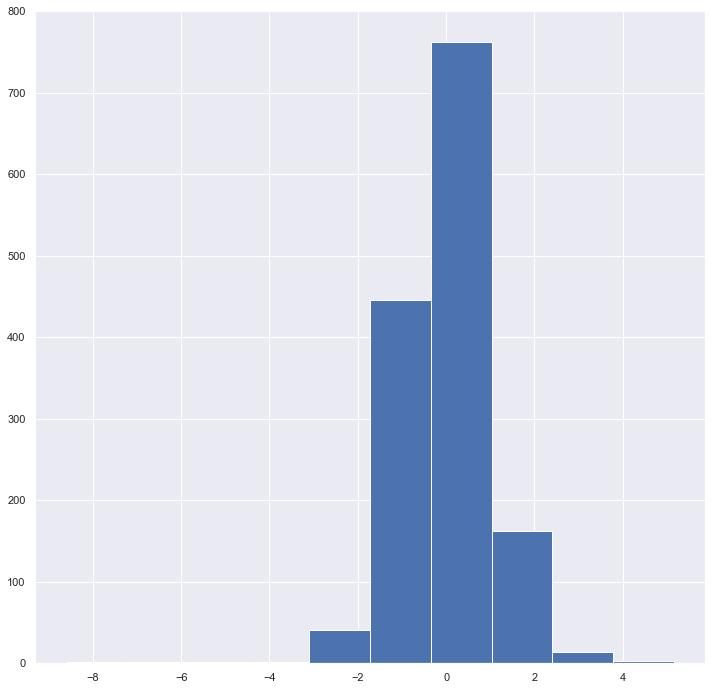

In [188]:
#3. Normality:
plt.hist(final_car_model.resid_pearson) 

Errors are normally distributed

((array([-3.29970984, -3.04210984, -2.89883213, ...,  2.89883213,
          3.04210984,  3.29970984]),
  array([-8.61835744, -6.07197611, -5.44627762, ...,  4.10557919,
          4.85539975,  5.16489457])),
 (0.9743618661968833, 1.954583879378123e-12, 0.9751145803599871))

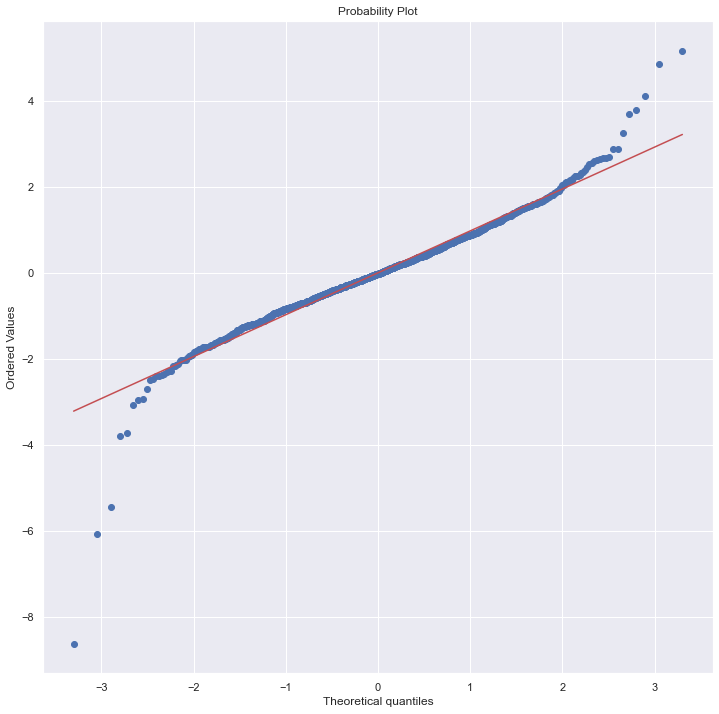

In [189]:
#4. Q-Q plot:
import pylab
import scipy.stats as st
st.probplot(final_car_model.resid_pearson, dist='norm',plot=pylab)

We could see the normally distributed errors

In [190]:
final_car_model.rsquared

0.8683161616951844